# Overview: Game Maps and Players (Interactions)

In [1]:
# Pandas
import numpy as np
import pandas as pd
# Plot
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('seaborn-whitegrid')
%matplotlib inline

Read data

In [2]:
dataset_folder = '../input'
plot_folder = '../plot'

courses = pd.read_csv('%s/%s' % (dataset_folder, 'courses.csv'), sep='\t', encoding='utf-8')
likes   = pd.read_csv('%s/%s' % (dataset_folder, 'likes.csv'), sep='\t', encoding='utf-8')
plays   = pd.read_csv('%s/%s' % (dataset_folder, 'plays.csv'), sep='\t', encoding='utf-8')
clears  = pd.read_csv('%s/%s' % (dataset_folder, 'clears.csv'), sep='\t', encoding='utf-8')
records = pd.read_csv('%s/%s' % (dataset_folder, 'records.csv'), sep='\t', encoding='utf-8')

Create a `dict` to store the interactions.

In [3]:
ids = courses['id'].unique().tolist()
interactions = {id:{'likes':0, 'plays':0, 'clears':0, 'records':0} for id in ids}

## Overview

In [4]:
names = ['courses','likes','plays','clears','records']
for df, name in zip([courses,likes,plays,clears,records], names):
    print('%s:' % (name), len(df))

courses: 115032
likes: 618687
plays: 3941378
clears: 2051809
records: 117126


### Likes

In [5]:
likes.head()

,catch,id,player
0,2018-02-23 15:22:44.015,0000-0000-0353-3D35,groebenzell
1,2018-03-02 09:46:27.847,0000-0000-035A-9F14,jlan6e
2,2017-12-18 14:47:47.489,0001-0000-0347-486A,cat38690
3,2017-12-18 14:47:47.489,0001-0000-0347-486A,raulcaba
4,2017-12-18 14:47:48.878,0001-0000-0359-B3CD,Tugaeddy


In [6]:
# count number of likes per map
likes_per_course = likes['id'].value_counts().to_dict()

In [7]:
for id, values in likes_per_course.items():
    interactions[id]['likes'] = values

### Plays

In [8]:
plays.head()

,catch,id,player
0,2018-02-23 15:22:44.015,0000-0000-0353-3D35,darter60k
1,2018-02-23 15:22:44.015,0000-0000-0353-3D35,davidchofis
2,2018-02-23 15:22:44.015,0000-0000-0353-3D35,fabioviana
3,2018-02-23 15:22:44.015,0000-0000-0353-3D35,gorigokky
4,2018-02-23 15:22:44.015,0000-0000-0353-3D35,groebenzell


In [9]:
# count number of plays per map
plays_per_course = plays['id'].value_counts().to_dict()

In [10]:
for id, values in plays_per_course.items():
    interactions[id]['plays'] = values

### Clears

In [11]:
clears.head()

,catch,id,player
0,2018-02-23 15:22:44.015,0000-0000-0353-3D35,darter60k
1,2018-02-23 15:22:44.015,0000-0000-0353-3D35,davidchofis
2,2018-02-23 15:22:44.015,0000-0000-0353-3D35,fabioviana
3,2018-02-23 15:22:44.015,0000-0000-0353-3D35,groebenzell
4,2018-02-23 15:22:44.015,0000-0000-0353-3D35,igatake0229


In [12]:
# count number of clears per map
clears_per_course = clears['id'].value_counts().to_dict()

In [13]:
for id, values in clears_per_course.items():
    interactions[id]['clears'] = values

### Records

In [14]:
records.head()

,catch,id,player,timeRecord
0,2017-12-18 15:35:29.015,F68A-0000-0337-AF4F,The_Brucican,15482
1,2018-03-02 10:09:32.392,9669-0000-0330-554C,inoino2226,9265
2,2017-12-18 15:47:40.665,0D1D-0000-0355-DA7A,hbeeboy,6692
3,2018-02-23 15:02:20.557,18E3-0000-032A-27AB,Khazey,40383
4,2018-02-23 15:05:16.414,2C55-0000-0300-854A,okayan3378,1533


In [15]:
# count number of records per map
records_per_course = records['id'].value_counts().to_dict()

In [16]:
for id, values in records_per_course.items():
    interactions[id]['records'] = values

### Plot

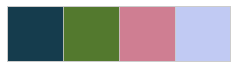

In [17]:
# palette of colors
palette = sns.color_palette('cubehelix', 4)
sns.palplot(palette)

In [18]:
# data sorted
df = pd.DataFrame(interactions).transpose()
df['sum'] = df['likes'] + df['plays'] + df['clears'] + df['records']
df = df.sort_values(by=['sum'], ascending=False)

In [19]:
df.head()

,clears,likes,plays,records,sum
5AB9-0000-038F-A23E,1475,316,1673,2,3466
DE4D-0000-035D-3AE1,612,462,1089,1,2164
8F40-0000-0391-4B50,851,185,1014,1,2051
CE94-0000-038F-7559,737,193,997,1,1928
BAC8-0000-036A-7EE1,622,322,937,1,1882


In [20]:
# settings
limit = 100
fontsize = 14

# getting axis
axis_id = df.index.tolist()[0:limit]
axis_plays = df['plays'].tolist()[0:limit]
axis_clears = df['clears'].tolist()[0:limit]
axis_records = df['records'].tolist()[0:limit]
axis_likes = df['likes'].tolist()[0:limit]

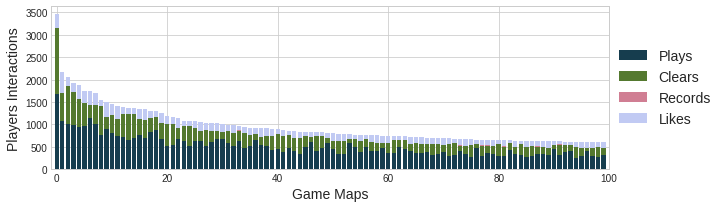

In [21]:
# plot
fig, ax = plt.subplots()
bottom_records  = [axis_plays[i] + axis_clears[i] for i in range(0, limit)]
bottom_likes    = [bottom_records[i] + axis_records[i] for i in range(0, limit)]

# bar plot
p1 = plt.bar(range(0, limit), axis_plays, color=palette[0], label='Plays')
p2 = plt.bar(range(0, limit), axis_clears, bottom=axis_plays, color=palette[1], label='Clears')
p3 = plt.bar(range(0, limit), axis_records, bottom=bottom_records, color=palette[2], label='Records')
p4 = plt.bar(range(0, limit), axis_likes, bottom=bottom_likes, color=palette[3], label='Likes')

# texts and labels
plt.ylabel('Players Interactions', fontsize=fontsize)
plt.xlabel('Game Maps', fontsize=fontsize)
lgd = ax.legend(loc='center', bbox_to_anchor=(0.85, 0, 0.5, 1), prop={'size':fontsize})

# ticks
fig.set_size_inches(10, 3, forward=True)
plt.xlim(-1, 100)
plt.savefig('%s/%s.pdf' % (plot_folder, 'interactions'), dpi=300, bbox_extra_artists=(lgd,), bbox_inches='tight')
plt.show()